### Imports

In [3]:
import pandas as pd
from logger import logger

### Loading data

In [4]:
df_lidar = pd.read_table('../training_data/lidar_2rounds', sep=",", index_col=0)
df_lidar.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,7.4565,6.8632,8.4021,10.2755,12.9451,9.7520,5.7550,5.8843,3.9540,20.0,20.0,5.2561,2.7631,4.3158,5.5333,1.4624,-32.0
1,7.4570,6.8637,8.4026,10.2759,12.9455,9.7523,5.7554,5.8845,3.9542,20.0,20.0,5.2564,2.7635,4.3162,5.5337,1.4628,-32.0
2,7.4565,6.8633,8.4022,10.2756,12.9452,11.2514,5.7551,5.8844,20.0000,20.0,20.0,5.2560,2.7631,4.3157,5.5332,1.4624,-32.0
3,7.4554,6.8621,8.4012,10.2746,12.9443,11.2507,5.7545,5.8839,20.0000,20.0,20.0,5.2550,2.7620,4.3146,5.5320,1.4612,-32.0
4,7.4533,6.8601,8.3994,10.2729,12.9429,11.2495,5.7534,5.8832,20.0000,20.0,20.0,5.2533,2.7600,4.3126,5.5299,1.4590,-32.0


In [5]:
df_sonar = pd.read_csv('../training_data/sonar.samples', sep=" ", header=None)
df_sonar.head()

,0,1,2,3
0,1.5067,1.3101,1.7966,-22.0
1,1.5075,1.3106,1.7970,-22.0
2,1.5075,1.3106,1.7970,-22.0
3,1.5075,1.3106,1.7970,-22.0
4,1.5075,1.3106,1.7970,-22.0


In [6]:
display(df_lidar.describe())
df_sonar.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.0,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000
mean,10.693885,8.967424,9.769526,8.566755,9.177894,7.244609,8.707776,7.357612,14.008577,20.0,16.453719,14.921087,15.125725,14.501483,13.905103,11.930902,2.303507
std,7.652275,7.376931,7.386916,7.180727,7.311107,6.133312,6.572315,5.748568,6.605551,0.0,6.392659,7.513922,7.336148,7.803161,7.936621,8.340058,13.854609
min,0.414600,0.525200,0.523800,0.618800,0.511600,0.417700,0.375900,0.339300,0.322900,20.0,0.361900,0.196700,0.209900,0.225400,0.181100,0.261600,-54.500000
25%,3.681450,3.221025,3.645825,2.777900,2.713675,3.079200,3.745200,3.610550,7.569425,20.0,20.000000,6.336300,6.655275,5.550175,5.495475,3.033000,-2.500000
50%,7.083500,5.242600,6.477100,5.751850,6.973350,5.057700,6.604600,5.511900,15.596000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,1.500000
75%,20.000000,20.000000,20.000000,20.000000,20.000000,9.314150,11.631475,8.917025,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,7.500000
max,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,53.000000


,0,1,2,3
count,5920.000000,5920.000000,5.920000e+03,5920.000000
mean,1.885385,1.540811,8.445946e+16,3.326014
std,0.386761,0.570198,2.905209e+18,10.068282
min,0.543400,0.360300,6.499000e-01,-22.000000
25%,1.655500,1.288975,1.034200e+00,0.000000
50%,1.854600,1.497100,1.169600e+00,0.000000
75%,2.084300,1.698600,1.328225e+00,0.000000
max,3.253800,7.921100,1.000000e+20,22.000000


### Preprocessing data

In [7]:
# build pipeline to find duplicates, count them and remove them and to normalize the data between 0 and 1

duplicates_lidar = len(df_lidar[df_lidar.duplicated()])
duplicates_sonar = len(df_sonar[df_sonar.duplicated()])

print(f"# of duplicates found:\nLidar: {duplicates_lidar} of {len(df_lidar)} items\nSonar: {duplicates_sonar} of {len(df_sonar)} items")
 

# of duplicates found:
Lidar: 330 of 3308 items
Sonar: 4182 of 5920 items


In [8]:
lidar_no_dup = df_lidar[~df_lidar.duplicated()]
sonar_no_dup = df_sonar[~df_sonar.duplicated()]

len(sonar_no_dup)

1738

### Neural Net class

In [9]:
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.utils.data as tud
from tqdm import tqdm
import matplotlib.pyplot as plt
import pickle
import mlflow

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)

class Dataset(tud.Dataset):
    'Characterizes a dataset for PyTorch'
    def __init__(self, data):
            'Initialization'
            self.data = torch.tensor(np.array(data))    

    def __len__(self):
            'Denotes the total number of samples'
            return len(self.data)

    def __getitem__(self, index):
            'Generates one sample of data'
            # Select sample
            sample = self.data[index]

            # return x and y
            X = sample[:-1]
            y = sample[-1]
            return X.to(torch.float32), y.to(torch.float32)

class NeuralNet:
    def __init__(self, hidden_layers, sensor, epochs, lr, batch_size, batchnorm=True, relu=True) -> None:
        self.hidden_layers = hidden_layers
        self.sensor = sensor
        self.epochs = epochs
        self.lr = lr
        self.batch_size = batch_size
        self.batchnorm = batchnorm
        self.relu = relu
        self.model = self.create_model()
        

    def create_model(self):
        model = nn.Sequential()
        for i, j in enumerate(self.hidden_layers):
            if i != (len(self.hidden_layers) - 1):
                model.add_module(f"linear_{i+1}", nn.Linear(j[0], j[1]))
                if self.batchnorm == True:
                    model.add_module(f"batch_norm_{i+1}", nn.BatchNorm1d(j[1]))
                if self.relu == True:
                    model.add_module(f"relu_{i+1}", nn.ReLU())
            else:
                model.add_module(f"linear_{i+1}", nn.Linear(j[0], j[1]))
        return model
    
    def train(self, filename):
        if self.sensor == "lidar":
            self.data = lidar_no_dup
        else:
            self.data = sonar_no_dup
        print("Training...")
        train_dataset = Dataset(self.data)

        train_loader = tud.DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)

        criterion = nn.MSELoss()
        optimizer = optim.Adam(self.model.parameters(), lr=self.lr)
        self.model.train()

        mse_list = []
        for epoch in tqdm(range(self.epochs)):
            # print(f"##### EPOCH {epoch} #####")
            losses = []
            for i, (x, y) in enumerate(iter(train_loader)):
                optimizer.zero_grad()
                outputs = self.model(x.to(DEVICE))
                loss = criterion(outputs, y.reshape(-1, 1).to(DEVICE))
                loss.backward()
                optimizer.step()
                losses.append(loss.item())
            loss_avg = sum(losses) / len(losses)
            if epoch % 50 == 0:
                print(loss_avg)
            mse_list.append(loss_avg)

        fig, ax = plt.subplots(figsize=(15, 6))

        ax.set(xlabel='epochs', ylabel='MSE', title='Gradient Descent')

        ax.plot(range(self.epochs), mse_list, 'blue')
        
        plt.savefig(f'../loss_graphs/{filename}.png')
        # plt.show()
        
        return mse_list

    def save_model(self, filename):
        # open a file, where you ant to store the data
        file = open(f'../models/{filename}.pickle', 'wb')

        # dump information to that file
        pickle.dump(self.model, file)

        # close the file
        file.close()

cuda


### Training

In [8]:
# hyperparameters
hidden_layers_list = [
    [[16, 64], [64, 64], [64, 128], [128, 1]],
    [[16, 64], [64, 128], [128, 1]],
    [[16, 64], [64, 1]],
    [[16, 32], [32, 64], [64, 128], [128, 1]],
    [[16, 32], [32, 128], [128, 1]],
    [[16, 32], [32, 1]],
    [[16, 16], [16, 32], [32, 64], [64, 1]],
    [[16, 16], [16, 32], [32, 1]],
    [[16, 16], [16, 1]],
]
sensor_list = ["lidar"]
epochs_list = [450]
lr_list = [0.00001]
batch_size_list = [25, 50]
batchnorm_list = [False]
relu_list = [False]

In [1]:
# loop over all possibilities
for sensor in sensor_list:
    for hidden_layers in hidden_layers_list:
        for epochs in epochs_list:
            for lr in lr_list:
                for batch_size in batch_size_list:
                    for batchnorm in batchnorm_list:
                        for relu in relu_list:
                            if sensor == "sonar":
                                hidden_layers[0][0] = 3
                            # get hidden layers string
                            hidden_layers_str = ""
                            for layer in hidden_layers[:-1]:
                                hidden_layers_str += f"{str(layer[1])}_"

                            # get notebook_str
                            notebook_str = f"nn_{sensor}_layers_{len(hidden_layers)}_{hidden_layers_str}epochs_{epochs}_lr_{str(lr)[2:]}_batchsize_{batch_size}"

                            if batchnorm:
                                notebook_str += "_batchnorm"
                            if relu:
                                notebook_str += "_relu"
                            
                            logger.info(f'Running process for Neural Net ({sensor}) | layers: {len(hidden_layers)}, epochs: {epochs}, lr: {lr}, batchsize: {batch_size}')
                                                        
                            # create network
                            neural_net = NeuralNet(hidden_layers, sensor, epochs, lr, batch_size, batchnorm, relu)
                            # send network to GPU
                            neural_net.model.to(DEVICE)
                            # train network
                            mse = neural_net.train(notebook_str)
                            # save model
                            neural_net.save_model(notebook_str)
                            
                            # register experiments in mlflow
                            mlflow.set_experiment('Autonomous driving of a car')
                            with mlflow.start_run(run_name=f'Neural net ({sensor}) | layers: {len(hidden_layers)}, epochs: {epochs}, lr: {lr}, batchsize: {batch_size}'):
                                mlflow.log_param('sensor', sensor)
                                mlflow.log_param('num_layers', len(hidden_layers))
                                mlflow.log_param('layers', hidden_layers_str)
                                mlflow.log_param('batchnorm', batchnorm)
                                mlflow.log_param('relu', relu)
                                mlflow.log_param('epochs', epochs)
                                mlflow.log_param('lr', lr)
                                mlflow.log_param('batch_size', batch_size)
                                mlflow.log_param('lr', lr)
                                mlflow.log_metric('mse_list', mse[-1])
                                mlflow.log_artifact(f"../models/{notebook_str}.pickle")
                                mlflow.log_artifact(f"../loss_graphs/{notebook_str}.png")

NameError: name 'sensor_list' is not defined

[24/Apr/2023 14:09:16] INFO - Running process for Neural Net (lidar) | layers: 4, epochs: 100, lr: 0.0001, batchsize: 60
Training...


  2%|▏         | 2/100 [00:00<00:16,  5.90it/s]

194.91365631103517
186.538624420166


  4%|▍         | 4/100 [00:00<00:13,  7.04it/s]

175.20406967163086
164.68035659790038


  6%|▌         | 6/100 [00:00<00:11,  8.04it/s]

153.48383911132814
142.55938034057618


  8%|▊         | 8/100 [00:01<00:11,  8.08it/s]

132.42286376953126
123.86105232238769


 10%|█         | 10/100 [00:01<00:10,  8.44it/s]

117.12512184143067
110.97660095214843


 12%|█▏        | 12/100 [00:01<00:10,  8.58it/s]

108.0368751525879
104.39189476013183


 14%|█▍        | 14/100 [00:01<00:09,  8.66it/s]

101.78597496032715
100.27466438293457


 16%|█▌        | 16/100 [00:01<00:09,  9.03it/s]

96.61249114990234
94.50746444702149


 18%|█▊        | 18/100 [00:02<00:08,  9.44it/s]

93.41734725952148
91.7148811340332


 20%|██        | 20/100 [00:02<00:08,  9.22it/s]

91.075013961792
88.9018487548828


 22%|██▏       | 22/100 [00:02<00:08,  9.52it/s]

88.18517700195312
85.00476875305176


 24%|██▍       | 24/100 [00:02<00:07,  9.64it/s]

83.89439781188965
83.30979705810547


 26%|██▌       | 26/100 [00:03<00:08,  9.16it/s]

81.95668510437012
80.33844978332519


 28%|██▊       | 28/100 [00:03<00:07,  9.22it/s]

78.2134620666504
80.38037879943847


 30%|███       | 30/100 [00:03<00:07,  9.61it/s]

75.70789169311523
74.69091598510742


 32%|███▏      | 32/100 [00:03<00:07,  8.97it/s]

75.2181297302246
74.85145202636718


 34%|███▍      | 34/100 [00:03<00:07,  9.18it/s]

72.86386375427246
71.06392417907715


 36%|███▌      | 36/100 [00:04<00:06,  9.39it/s]

69.65091361999512
69.90223659515381


 38%|███▊      | 38/100 [00:04<00:06,  9.58it/s]

69.11813735961914
67.92486511230469


 40%|████      | 40/100 [00:04<00:06,  9.33it/s]

67.22450256347656
66.82298728942871


 42%|████▏     | 42/100 [00:04<00:06,  8.97it/s]

64.8804451751709
64.3771583557129


 44%|████▍     | 44/100 [00:05<00:06,  8.89it/s]

63.613516311645505
62.10110778808594


 46%|████▌     | 46/100 [00:05<00:05,  9.06it/s]

60.45291572570801
60.730028038024905


 48%|████▊     | 48/100 [00:05<00:05,  9.13it/s]

60.12621044158936
59.27898433685303


 50%|█████     | 50/100 [00:05<00:05,  9.20it/s]

57.97595405578613
55.57058334350586


 52%|█████▏    | 52/100 [00:05<00:05,  9.24it/s]

57.771656646728516
58.244673042297364


 54%|█████▍    | 54/100 [00:06<00:04,  9.25it/s]

54.573550338745115
54.04151432037354


 56%|█████▌    | 56/100 [00:06<00:05,  8.66it/s]

54.047357063293454
54.12953147888184


 58%|█████▊    | 58/100 [00:06<00:05,  7.89it/s]

50.68719825744629
50.02679286956787


 60%|██████    | 60/100 [00:06<00:04,  8.33it/s]

50.57221984863281
49.76095600128174


 62%|██████▏   | 62/100 [00:07<00:04,  8.55it/s]

50.03217281341553
51.1839489364624


 64%|██████▍   | 64/100 [00:07<00:04,  8.41it/s]

49.46738368988037
47.74908290863037


 66%|██████▌   | 66/100 [00:07<00:04,  7.97it/s]

47.2100341796875
46.64695415496826


 68%|██████▊   | 68/100 [00:07<00:03,  8.22it/s]

47.447697677612304
44.338254318237304


 70%|███████   | 70/100 [00:08<00:03,  8.30it/s]

45.93554874420166
44.269152870178225


 72%|███████▏  | 72/100 [00:08<00:03,  8.53it/s]

44.25858455657959
44.13780673980713


 74%|███████▍  | 74/100 [00:08<00:03,  8.53it/s]

44.20445964813232
42.12498268127442


 76%|███████▌  | 76/100 [00:08<00:02,  8.28it/s]

41.15492481231689
42.21571517944336


 78%|███████▊  | 78/100 [00:09<00:02,  8.34it/s]

40.58328380584717
41.139229202270506


 80%|████████  | 80/100 [00:09<00:02,  7.77it/s]

40.360348320007326
40.597362213134765


 82%|████████▏ | 82/100 [00:09<00:02,  8.25it/s]

39.95016647338867
43.33156818389892


 84%|████████▍ | 84/100 [00:09<00:01,  8.45it/s]

36.69629749298096
39.55401958465576


 86%|████████▌ | 86/100 [00:09<00:01,  7.91it/s]

38.64547012329101
37.84811698913574


 88%|████████▊ | 88/100 [00:10<00:01,  8.40it/s]

37.2177543258667
37.1093611907959


 90%|█████████ | 90/100 [00:10<00:01,  8.71it/s]

37.7695711517334
36.03158432006836


 92%|█████████▏| 92/100 [00:10<00:00,  8.63it/s]

39.092967109680174
38.939773902893066


 94%|█████████▍| 94/100 [00:10<00:00,  8.83it/s]

38.02845489501953
36.59246362686157


 96%|█████████▌| 96/100 [00:11<00:00,  8.83it/s]

36.675412826538086
33.54496662139893


 98%|█████████▊| 98/100 [00:11<00:00,  8.82it/s]

35.577217712402344
34.388762893676756


100%|██████████| 100/100 [00:11<00:00,  8.64it/s]

34.59306344985962
34.4429923248291


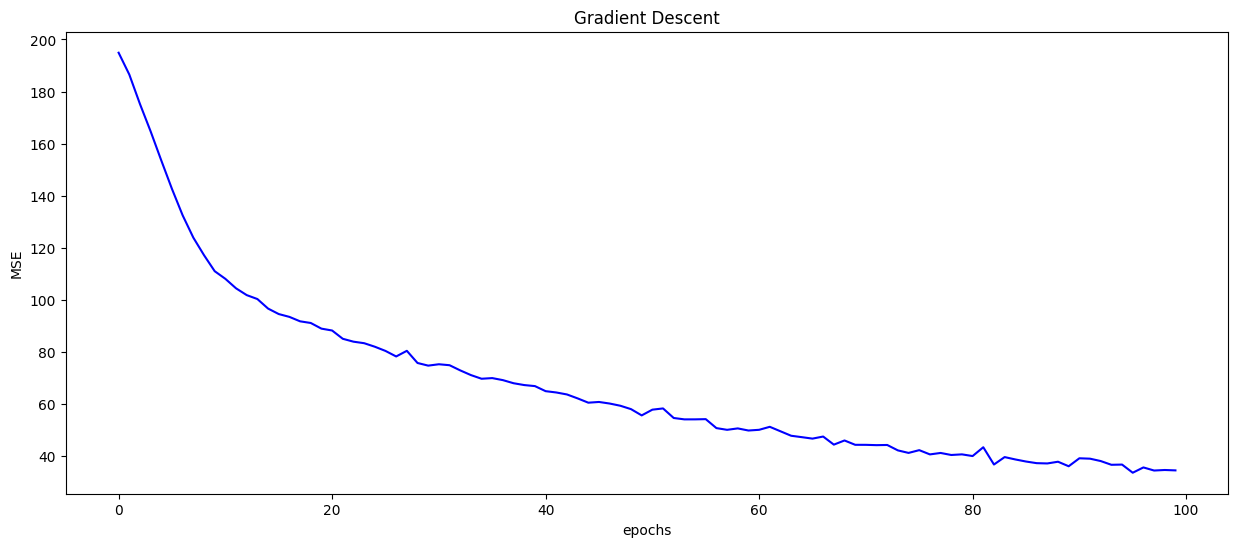

In [11]:
hidden_layers = [[16, 64], [64, 64], [64, 128], [128, 1]]
epochs = 100
lr = 0.0001
batch_size = 60
batchnorm = True
relu = True
sensor = "lidar"
# get hidden layers string
hidden_layers_str = ""
for layer in hidden_layers[:-1]:
    hidden_layers_str += f"{str(layer[1])}_"

# get notebook_str
notebook_str = f"nn_{sensor}_layers_{len(hidden_layers)}_{hidden_layers_str}epochs_{epochs}_lr_{str(lr)[2:]}_batchsize_{batch_size}"

if batchnorm:
    notebook_str += "_batchnorm"
if relu:
    notebook_str += "_relu"

logger.info(f'Running process for Neural Net ({sensor}) | layers: {len(hidden_layers)}, epochs: {epochs}, lr: {lr}, batchsize: {batch_size}')
                            
# create network
neural_net = NeuralNet(hidden_layers, sensor, epochs, lr, batch_size, batchnorm, relu)
# send network to GPU
neural_net.model.to(DEVICE)
# train network
mse = neural_net.train(notebook_str)
# save model
neural_net.save_model(notebook_str)

[24/Apr/2023 15:23:08] INFO - Running process for Neural Net (sonar) | layers: 4, epochs: 300, lr: 0.0001, batchsize: 100
Training...


  1%|          | 2/300 [00:00<00:24, 12.26it/s]

111.05671861436632


 18%|█▊        | 55/300 [00:02<00:12, 20.28it/s]

27.616851859622532


 35%|███▌      | 105/300 [00:05<00:09, 19.99it/s]

24.01980267630683


 51%|█████     | 153/300 [00:07<00:07, 20.30it/s]

20.480863094329834


 68%|██████▊   | 204/300 [00:10<00:04, 19.99it/s]

18.517062664031982


 85%|████████▍ | 254/300 [00:13<00:02, 20.27it/s]

17.873453193240696


100%|██████████| 300/300 [00:15<00:00, 18.90it/s]


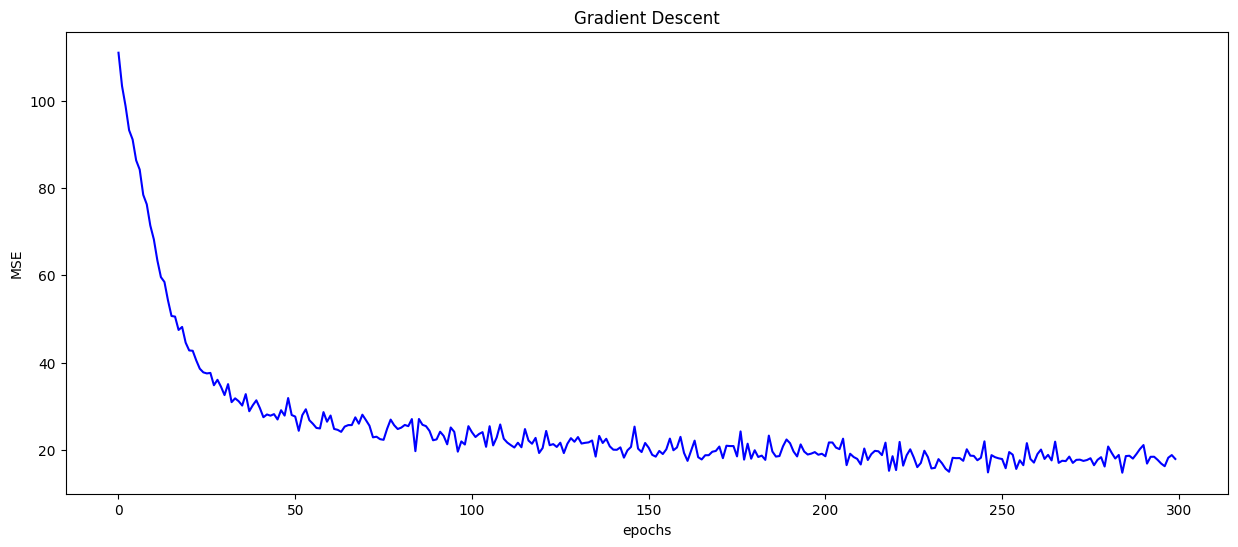

In [14]:
hidden_layers = [[3, 16], [16, 64], [64, 256], [256, 64], [64, 1]]
epochs = 300
lr = 0.0001
batch_size = 70
batchnorm = True
relu = True
sensor = "sonar"
# get hidden layers string
hidden_layers_str = ""
for layer in hidden_layers[:-1]:
    hidden_layers_str += f"{str(layer[1])}_"

# get notebook_str
notebook_str = f"nn_{sensor}_layers_{len(hidden_layers)}_{hidden_layers_str}epochs_{epochs}_lr_{str(lr)[2:]}_batchsize_{batch_size}"

if batchnorm:
    notebook_str += "_batchnorm"
if relu:
    notebook_str += "_relu"

logger.info(f'Running process for Neural Net ({sensor}) | layers: {len(hidden_layers)}, epochs: {epochs}, lr: {lr}, batchsize: {batch_size}')
                            
# create network
neural_net = NeuralNet(hidden_layers, sensor, epochs, lr, batch_size, batchnorm, relu)
# send network to GPU
neural_net.model.to(DEVICE)
# train network
mse = neural_net.train(notebook_str)
# save model
neural_net.save_model(notebook_str)